# ANOVA

## Summary
This document analyzes the difference between sensors on the same trailer, including the difference in variance in pickup speed and NA ratio (ANOVA, F-test). Below the graphs show the p-values for the F-test

### Imports
Imports should be grouped in the following order:
1. Magics

2. Alphabetical order
    
    A. standard librarby imports
    
    B. related 3rd party imports
    
    C. local application/library specific imports

In [ ]:
# Magics
%matplotlib inline
# Do below if you want interactive matplotlib plot ()
# %matplotlib notebook

# Reload modules before executing user code
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# Show version information for dependency modules
# https://github.com/jrjohansson/version_information
%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

In [1]:
# Standard library
import os
import sys
# sys.path.append('../src/')

# Third party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import statistics as stats
import scipy.stats as ss

# Local imports

In [2]:
# Customizations
sns.set() # matplotlib defaults

# Any tweaks that normally go in .matplotlibrc, etc., should be explicitly stated here
plt.rcParams['figure.figsize'] = (12,8)
%config InlineBackend.figure_format = 'retina'

### Load data

In [3]:
df = pd.read_pickle('../data/wss_n_c1')

In [4]:
# This function is used to calculate the F-test P-value of two individule samples
def Ftest_pvalue(d1,d2):
    df1 = len(d1) - 1
    df2 = len(d2) - 1
    F = stats.variance(d1) / stats.variance(d2)
    single_tailed_pval = ss.f.cdf(F,df1,df2)
    double_tailed_pval = single_tailed_pval * 2
    return double_tailed_pval

In [5]:
# This function is used to calculate the F-test P-value per itapudid. Analyzing the difference between sensors per itap
def cal_Ftest_P(df):
    # Select the distinct itapudid
    df_new = df.groupby('itapudid').describe().reset_index().itapudid
    # Add new column speedFtestPvalue
    df_new = pd.DataFrame(df_new, columns=['itapudid','speedFtestPvalue'])
    # Find the itap whose records are less than 2
    df_drop = df.groupby('itapudid').count().reset_index()
    df_drop = df_drop[df_drop['speed']<4].itapudid
    # Drop these itap events which are not suitable for F-test analysis
    for i in df_drop:
        df_new = df_new[df_new.itapudid!=i]
    df_new = df_new.reset_index(drop=True)
    #Calculate the F-test P-value
    for i in range(df_new.shape[0]):
        df_temp = df[df['itapudid'] == df_new.get_value(i,'itapudid')]
        df_temp1 = df_temp[(df_temp['sensor'] == 'C')|(df_temp['sensor'] == 'E')]
        df_temp2 = df_temp[(df_temp['sensor'] == 'D')|(df_temp['sensor'] == 'F')]
        df_new.set_value(i, 'speedFtestPvalue', Ftest_pvalue(df_temp1.speed.values,df_temp2.speed.values))
    return df_new

In [6]:
df_ft = cal_Ftest_P(df)

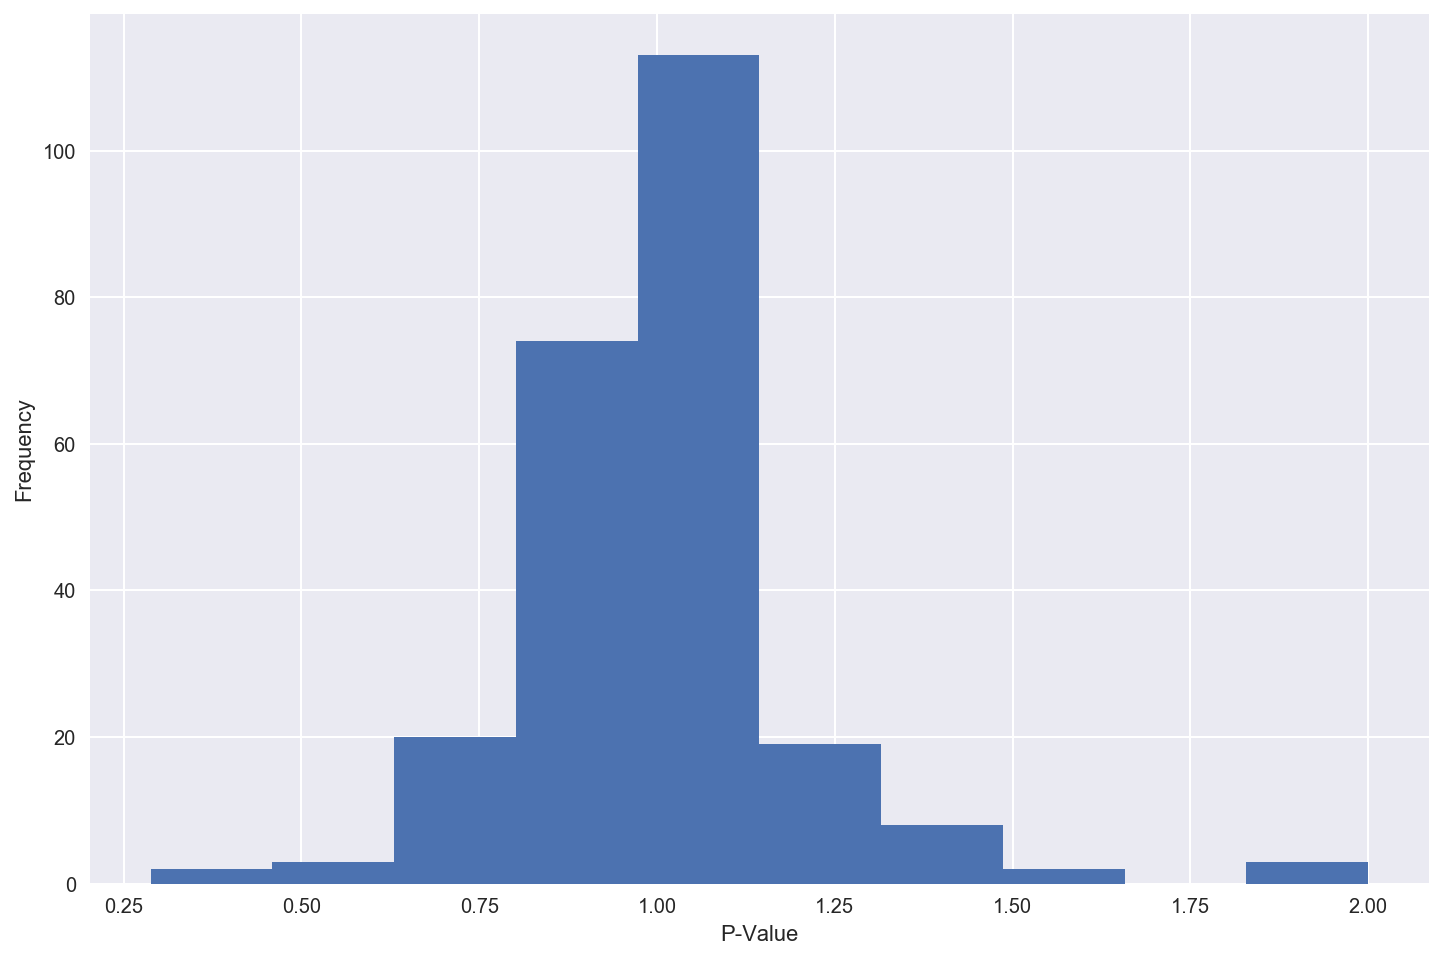

In [7]:
df_ft['speedFtestPvalue'].hist()
plt.ylabel('Frequency')
plt.xlabel('P-Value')
plt.show()

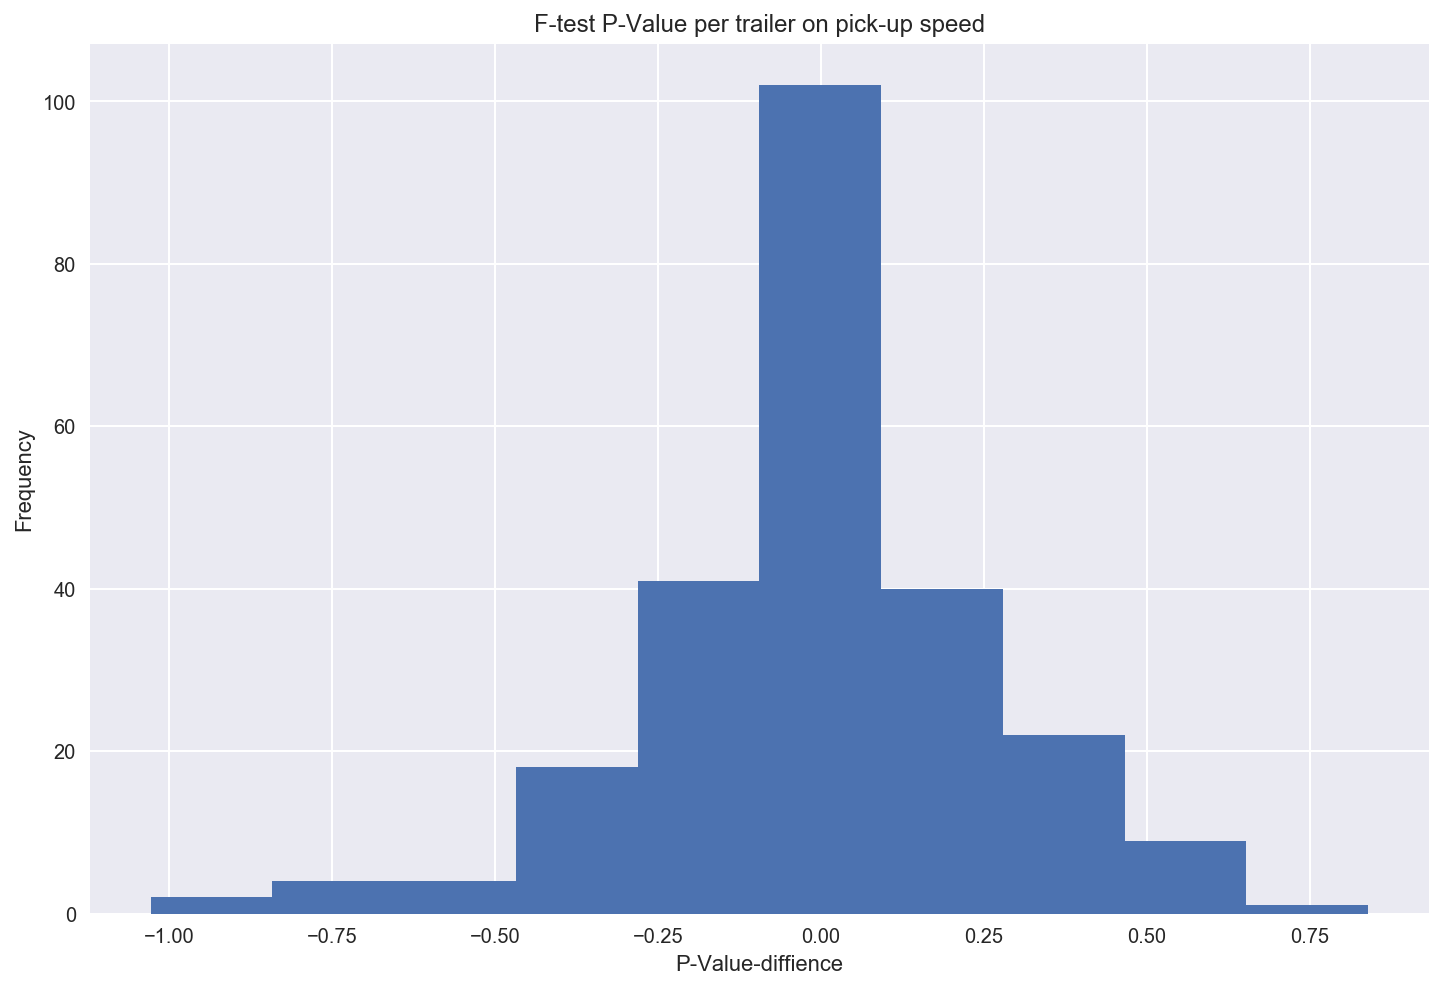

In [8]:
df_ft['speedFtestPvalue'].diff().hist()
plt.ylabel('Frequency')
plt.xlabel('P-Value-diffience')
plt.title('F-test P-Value per trailer on pick-up speed')
plt.show()

In [9]:
df_NA = pd.read_pickle('../data/na_ratio_wss_sensor')

In [11]:
F_P_NA = Ftest_pvalue(df_NA.na_value_ratio1.values,df_NA.na_value_ratio2.values)

In [12]:
F_P_NA

0.9999166017405311